In [137]:
import pandas as pd  # dataframe library
from collections import Counter
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import plotly.io as pio


filename = 'csv/kdrama_data.csv'
# filename = r"C:\Users\John Kim\Desktop\kdrama_data.csv"

df = pd.read_csv(filename)
df = df[['title', 'description', 'keywords', 'network', 'aired',
         'genres', 'actors', 'director', 'screenwriter']]


def remove_chars(string):
    if isinstance(string, str) == False:
        return string
    remove_list = ["[", "]", "'"]
    for remove in remove_list:
        string = string.replace(remove, "")
    return string


def get_info(title):
    df = pd.read_csv(filename)
    fill_na()
    index = search_kdrama(title)

    row = df.loc[index]
    dicti = row.to_dict()
    # removes unnecessary characters
    columns = ['keywords', 'genres', 'actors']
    for column in columns:
        dicti[column] = remove_chars(dicti[column])
    return dicti


def get_desc_word_count(desc):
    word_list = desc.split(' ')
    word_count = len(word_list)
    return word_count


def get_titles():
    np_titles = df['title'].to_numpy()
    title_list = np_titles.tolist()
    return title_list


def kdrama_exists(title, klist):
    if title is None:
        return False
    for kdrama in klist:
        if title.lower() == kdrama.lower():
            return True
    return False


def fill_na():
    """replaces na values with an empty string"""
    df.replace("N/A", "")
    for label in df.columns:
        df[label] = df[label].fillna('')  # fills N/A values with ""


def get_indices():
    indices = pd.Series(df.index, index=df['title'])
    return indices[~indices.index.duplicated(keep='last')]


def search_kdrama(kdrama_name):
    """searches for kdrama with matching name and returns top result"""
    # return get_indices()[get_indices().index.str.contains(kdrama_name, regex=False, na=False)][0]
    return get_indices()[get_indices().index.str.contains(kdrama_name.lower(), case=False, regex=False, na=False)][0]


In [57]:
pd.set_option('display.max_columns', None) # view all cols
ranks = []

for i in df.index:
    ranks.append(i+1)
    
df["rank"] = ranks
df

,title,description,keywords,network,aired,genres,actors,director,screenwriter,rank
0,Move to Heaven,Han Geu Roo is a 20-year-old with Autism. He w...,"['Uncle-Nephew Relationship', 'Autism', 'Death...",Netflix,2021-05-14,"['Life', 'Drama', 'Family']","['Lee Je Hoon', 'Tang Jun Sang', 'Hong Seung H...",Kim Sung Ho,Yoon Ji Ryun,1
1,Hospital Playlist,The stories of people going through their days...,"['Multiple Mains', 'Best Friends', 'Slow Roman...",Netflix,2020-03-12,"['Friendship', 'Romance', 'Life', 'Medical']","['Jo Jung Suk', 'Yoo Yeon Seok', 'Jung Kyung H...",Shin Won Ho,Lee Woo Jung,2
2,Flower of Evil,Although Baek Hee Sung is hiding a dark secret...,"['Married Couple', 'Deception', 'Family Secret...",tvN,2020-07-29,"['Thriller', 'Romance', 'Crime', 'Melodrama']","['Lee Joon Gi', 'Moon Chae Won', 'Jang Hee Jin...","Kim Chul Gyu, Yoon Jong Ho",Yoo Jung Hee,3
3,Hospital Playlist 2,Everyday is extraordinary for five doctors and...,"['Workplace', 'Strong Friendship', 'Best Frien...",Netflix,2021-06-17,"['Friendship', 'Romance', 'Life', 'Medical']","['Jo Jung Suk', 'Yoo Yeon Seok', 'Jung Kyung H...",Shin Won Ho,Lee Woo Jung,4
4,My Mister,Park Dong Hoon is a middle-aged engineer who i...,"['Nice Male Lead', 'Strong Female Lead', 'Smar...",tvN,2018-03-21,"['Psychological', 'Life', 'Drama', 'Family']","['Lee Sun Kyun', 'IU', 'Park Ho San', 'Song Sa...","Kim Won Suk, Kim Sang Woo",Park Hae Young,5
...,...,...,...,...,...,...,...,...,...,...
3027,Never Give Up,"Depicts the bromance of Goo Pil Soo, a breadwi...","['Businessman Male Lead', 'Entrepreneur Male L...",Olleh TV,2022-05-04,"['Comedy', 'Life', 'Drama']","['Yoon Doo Joon', 'Kwak Do Won', 'Han Go Eun',...",Choi Do Hoon,Son Geun Joo,3028
3028,Doctor Lawyer,Han Yi Han was an elite surgeon. He graduated...,"['Thoracic Surgeon Male Lead', 'Prosecutor Fem...",MBC,2022-06-03,"['Thriller', 'Law', 'Drama', 'Medical']","['So Ji Sub', 'Shin Sung Rok', 'Im Soo Hyang',...",Lee Yong Seok,Jang Hong Chul,3029
3029,My Rocket Ship,"Gong Ji Hoon, CEO of an AI art collection star...","['Startup', 'Entrepreneur Male Lead', 'Short L...",Naver TV Cast,2022-04-14,"['Business', 'Life', 'Youth', 'Drama']","['Kim Ji Hoon', 'Moon Kang Hyuk', 'Oh Se Young...",NaN,NaN,3030
3030,Gold Mask,"A tragedy occurs for three women, caused by gr...","['Married Female Lead', 'Loan Shark Female Lea...",KBS2,2022-05-23,"['Drama', 'Family', 'Melodrama']","['Cha Ye Ryun', 'Lee Hyun Jin', 'Na Young Hee'...",Uh Soo Sun,Kim Min Joo,3031


In [138]:
# # creating ratings dictionary
# for i in df_net.index:
#     rating = df_net.iloc[i]['rating']
#     if rating in ratings_dict: ratings_dict[rating] += 1
#     else: ratings_dict[rating] = 1

# # deleting invalid ratings
# del ratings_dict['74 min']
# del ratings_dict['84 min']
# del ratings_dict['66 min']
# print(ratings_dict)

# # converting to valid 2d list
# ratings = list(ratings_dict.keys())
# nums = list(ratings_dict.values())
# ratings_list = []

# for i in range(len(ratings)):
#     ratings_list.append([ratings[i], nums[i]])



import plotly.graph_objects as go

the_df = df.head(100) # top 100
the_df

the_dict = {}

for i in the_df.index: # creates dictionary for network hits
    network = the_df.iloc[i]['network']
    if network in the_dict: the_dict[network] +=1
    else: the_dict[network] = 1

labels = list(the_dict.keys()) # networks
values = list(the_dict.values()) # number of top hits from network

colors = ['#AA0000', '#AA3335','#AA4445', '#AA6666', '#AA5555', '#AA2225','#AA7777', '#AA8888'] # colors for plot

# fig7 = px.pie(the_df, names="network", color_discrete_sequence=px.colors.sequential.RdBu)
# fig7.update_traces(textposition='inside', textinfo='percent+label')

fig0 = go.Figure(data=[go.Pie(labels=labels, title="KDrama Network Share (Top 100 Shows)", values=values, pull=[0.2, 0, 0, 0])])
fig0.update_traces(textposition='inside', textinfo='percent+label', marker=dict(colors=colors))

fig0.show()
# fig7.show()

In [139]:
fh = open('fig0.html', 'w') # this just creates a blank file, so that the write_html() function can write to this file later
fh.close()

pio.write_html(fig0, file='fig0.html', auto_open=True, full_html=False) # preferred method

In [140]:
the_new_df = the_df.head(10)
fig1 = px.pie(the_new_df, names="network", title="KDrama Network Share (Top 10 Shows)", color_discrete_sequence=px.colors.sequential.RdBu)
fig1.update_traces(textposition='inside', textinfo='percent+label')
fig1.show()

In [143]:
fh = open('fig1.html', 'w') # this just creates a blank file, so that the write_html() function can write to this file later
fh.close()

pio.write_html(fig1, file='fig1.html', auto_open=True, full_html=False) # preferred method

In [116]:
networks = df['network'].dropna()
# networks
# networks.iloc[3030]
for i in range(2694): # creates dictionary for network hits
    print(i)
    print(networks.iloc[i])


0
Netflix
1
Netflix
2
tvN
3
Netflix
4
tvN
5
Netflix
6
tvN
7
tvN
8
tvN
9
Netflix
10
tvN
11
Netflix
12
Netflix
13
Netflix
14
tvN
15
Netflix
16
Netflix
17
jTBC
18
KBS2
19
MBC
20
Netflix
21
Netflix
22
MBC
23
tvN
24
Netflix
25
Netflix
26
Netflix
27
MBC
28
Netflix
29
Netflix
30
SBS
31
Netflix
32
tvN
33
KBS2
34
OCN
35
SBS
36
tvN
37
jTBC
38
SBS
39
Netflix
40
SBS
41
OCN
42
jTBC
43
tvN
44
SBS
45
tvN
46
SBS
47
jTBC
48
Netflix
49
SBS
50
Netflix
51
Netflix
52
MBC
53
tvN
54
SBS
55
SBS
56
jTBC
57
Netflix
58
SBS
59
SBS
60
SBS
61
tvN
62
KBS2
63
jTBC
64
Netflix
65
OCN
66
OCN
67
tvN
68
MBC
69
SBS
70
jTBC
71
MBC
72
KBS2
73
KBS2
74
MBC
75
KBS2
76
KBS2
77
Netflix
78
Netflix
79
MBC
80
KBS2
81
Netflix
82
SBS
83
jTBC
84
jTBC
85
MBC
86
OCN
87
iQiyi
88
jTBC
89
jTBC
90
tvN
91
OCN
92
SBS
93
SBS
94
MBC
95
OCN
96
jTBC
97
SBS
98
Netflix
99
Netflix
100
MBC
101
tvN
102
Netflix
103
SBS
104
tvN
105
KBS2
106
ViuTV
107
tvN
108
Daum Kakao TV
109
KBS2
110
OCN
111
jTBC
112
Netflix
113
KBS2
114
MBC
115
MBC
116
SBS
117
tvN
118


In [142]:
# generates fig for network kdrama shares
networks = df['network'].dropna()
networks

fig2 = px.pie(networks, names='network',
             title='KDrama Network Share (3000+ Shows)', color_discrete_sequence=px.colors.sequential.RdBu)
# fig2.update_traces(textposition='inside')
fig2.update_traces(textposition='inside', textinfo='percent+label')

fig2.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig2.show()


# net_dict = {}

# for i in range(2694): # creates dictionary for network hits
#     network = networks.iloc[i]
#     if network in net_dict: net_dict[network] +=1
#     else: net_dict[network] = 1

# labels = sorted(list(net_dict.keys()), reverse=True) # networks
# values = sorted(list(net_dict.values()), reverse=True) # number of top hits from network

# thresh = values[5] # jtbc

# other = 0

# networks = []
# net_values = []

# for i in range(len(labels)):
#     if values[i] < thresh: 
#         other += values[i]
#     else: 
#         networks.append(labels[i])
#         net_values.append(values[i])
        
        
# networks.append("Other")
# net_values.append(other)
# # print(networks)

# colors = ['#AA0000', '#AA3335','#AA4445', '#AA6666', '#AA5555', '#AA2225','#AA7777', '#AA8888'] # colors for plot


# fig11 = go.Figure(data=[go.Pie(labels=networks, values=net_values, pull=[0.2, 0, 0, 0])])
# fig11.update_traces(textposition='inside', textinfo='percent+label', marker=dict(colors=colors))

# fig11.show()

# threshold = 0.02*networks['network'].sum()
# m = networks['network'] < threshold
# DF_short = networks[~m].append(networks.loc[m, ['network']].sum().rename(8))
# DF_short['country'][DF_short['country'].isna()] = 'Other Countries'
# DF_short

# fig = px.pie(DF_short,
#              values='people_fully_vaccinated',
#              names='country',
#              hover_data=['country'],
#              labels={'country':'country'}
#             )

In [144]:
fh = open('fig2.html', 'w') # this just creates a blank file, so that the write_html() function can write to this file later
fh.close()

pio.write_html(fig2, file='fig2.html', auto_open=True, full_html=False) # preferred method

In [132]:
from collections import Counter
import plotly.express as px
import numpy as np

df_net = pd.read_csv('/Users/johnkim/Desktop/netflix_titles.csv')
df_net

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [128]:
# scatter plot between release_years and rating?just scatte rplot

fig10 = px.scatter(df_net, x="release_year", y="rating", title="Frequency of Ratings against Years of Release", labels={"release_year": "Year of Release", "rating": "Rating"})
fig10.update_traces(marker_size=10)
fig10.show()

In [153]:
fh = open('fig10.html', 'w') # this just creates a blank file, so that the write_html() function can write to this file later
fh.close()

pio.write_html(fig10, file='fig10.html', auto_open=True, full_html=False) # preferred method

In [145]:
import seaborn as sns
# type_df = df['type']
# type_df

# a,ax=plt.subplots(figsize=(10,5))
# sns.countplot(data=df_net, x='type',palette="viridis",ax=ax)

# plt.show()

# fig3 = px.bar(df_net, x='type', title='Number of TV Shows vs. Movies on Netflix')
# fig3.update_traces(marker_color='green')
# # fig = px.bar(df, 
# #              x='x', y='y', 
# #              color_discrete_sequence =['green']*len(df),
# #              title=title,
# #              labels={'x': 'Some X', 'y':'Some Y'})

# fig3.show()

fig3 = px.pie(df_net, names='type', 
             height=400, width=600, 
             hole=0.7, 
             title='Percentage of TV Shows vs. Movies on Netflix',
                   color_discrete_sequence=['#4c78a8', '#72b7b2'])
fig3.update_traces(hovertemplate=None, textposition='outside', textinfo='percent+label', rotation=0)
fig3.update_layout(margin=dict(t=100, b=30, l=0, r=0), showlegend=False,
                        plot_bgcolor='#fafafa', paper_bgcolor='#fafafa',
                        title_font=dict(size=20, color='#555',),
                        font=dict(size=17, color='#8a8d93'),
                        hoverlabel=dict(bgcolor="#444", font_size=13))
fig3.show()

In [146]:
fh = open('fig3.html', 'w') # this just creates a blank file, so that the write_html() function can write to this file later
fh.close()

pio.write_html(fig3, file='fig3.html', auto_open=True, full_html=False) # preferred method

In [147]:
ratings_dict = {} 

# creating ratings dictionary
for i in df_net.index:
    rating = df_net.iloc[i]['rating']
    if rating in ratings_dict: ratings_dict[rating] += 1
    else: ratings_dict[rating] = 1

# deleting invalid ratings
del ratings_dict['74 min']
del ratings_dict['84 min']
del ratings_dict['66 min']
print(ratings_dict)

# converting to valid 2d list
ratings = list(ratings_dict.keys())
nums = list(ratings_dict.values())
ratings_list = []

for i in range(len(ratings)):
    ratings_list.append([ratings[i], nums[i]])

# creating ratings dictionary
ratings_df = pd.DataFrame(ratings_list, columns=['rating','num'])
ratings_df
fig4 = px.histogram(ratings_df, x='rating', y='num', color='rating', title='Most Frequent Ratings of Movies and TV Shows on Neflix', labels={"num": "Quantity of Rating", "rating": "Rating"})
fig4.update_layout(yaxis_title="Quantity of Rating")

# plotting
fig4.show()

{'PG-13': 490, 'TV-MA': 3207, 'PG': 287, 'TV-14': 2160, 'TV-PG': 863, 'TV-Y': 307, 'TV-Y7': 334, 'R': 799, 'TV-G': 220, 'G': 41, 'NC-17': 3, 'NR': 80, nan: 4, 'TV-Y7-FV': 6, 'UR': 3}


In [148]:
fh = open('fig4.html', 'w') # this just creates a blank file, so that the write_html() function can write to this file later
fh.close()

pio.write_html(fig4, file='fig4.html', auto_open=True, full_html=False) # preferred method

In [154]:
fig5 = px.histogram(df_net, x='release_year', color_discrete_sequence=['indianred'], title="Number of Movies and TV Shows Released Over the Years")
fig5.update_layout(yaxis_title="Quantity of Movies and TV Shows Released", xaxis_title="Year of Release")

fig5.show()

In [150]:
fh = open('fig5.html', 'w') # this just creates a blank file, so that the write_html() function can write to this file later
fh.close()

pio.write_html(fig5, file='fig5.html', auto_open=True, full_html=False) # preferred method

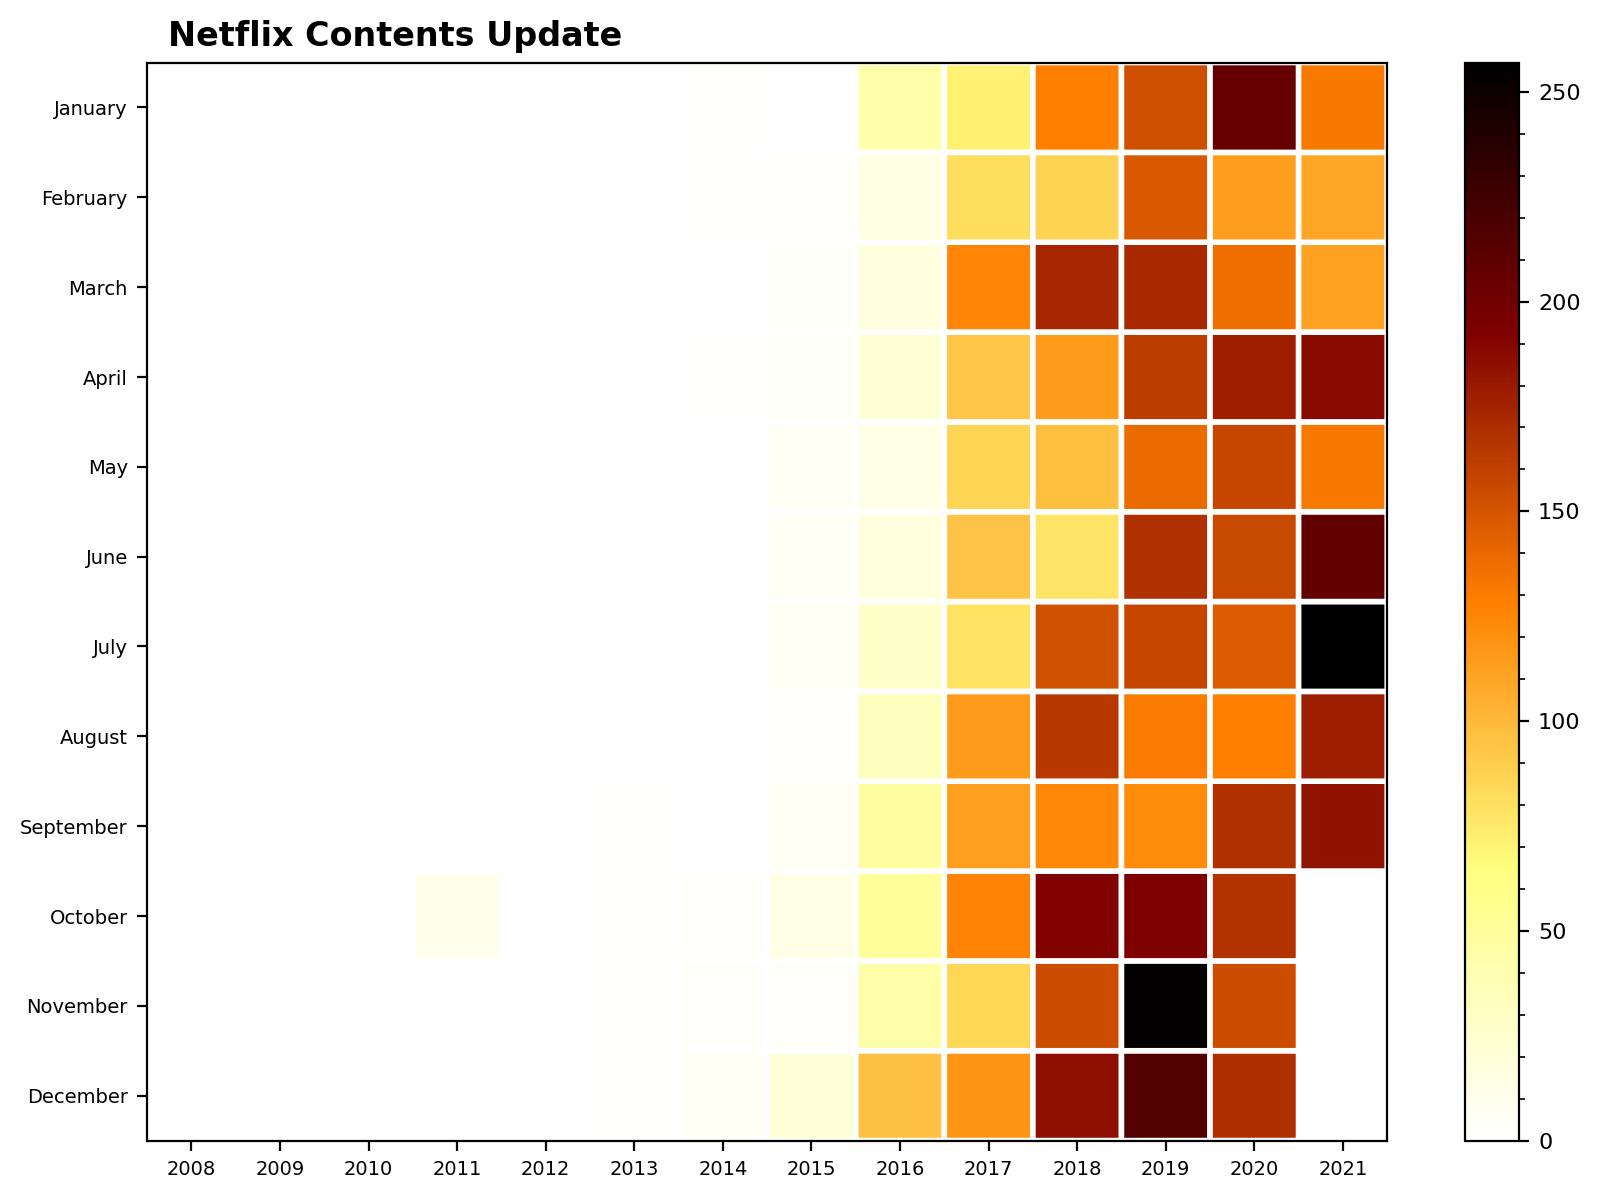

In [151]:
netflix_date = df_net[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df_net_date = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T # orientation
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df_net_date, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df_net_date.columns), 1), df_net_date.columns, fontsize=7)
plt.yticks(np.arange(0.5, len(df_net_date.index), 1), df_net_date.index, fontsize=7)

plt.title('Netflix Contents Update', fontsize=12, fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()

plt.show()

In [152]:
fh = open('plt.html', 'w') # this just creates a blank file, so that the write_html() function can write to this file later
fh.close()

pio.write_html(plt, file='plt.html', auto_open=True, full_html=False) # preferred method

ValueError: 
The fig parameter must be a dict or Figure.
    Received value of type <class 'module'>: <module 'matplotlib.pyplot' from '/Users/johnkim/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

In [44]:


# dealing with missing values by replacement
df_net['country'] = df_net['country'].fillna(df_net['country'].mode()[0])
df_net['cast'].replace(np.nan, 'No Data', inplace  = True)
df_net['director'].replace(np.nan, 'No Data', inplace  = True)

# drop NA
df_net.dropna(how = 'any', inplace=True)

# drop Duplicates
df_net.drop_duplicates(inplace= True)

df_tv=df_net[df_net['type']=='TV Show']
df_tv

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,No Data,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,No Data,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,No Data,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,No Data,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [45]:


#tv show
vc1 = df_tv['country'].value_counts().reset_index()
vc1 = vc1.rename(columns = {'index':'country', 'country':'count'})

country_tv=list(df_tv['country'])
print(country_tv)

cou_tv=[]
for i in country_tv:
    i = str(i)
    if i == 'nan': continue
    k = list(i.split(', '))
    for j in k:
        cou_tv.append(j)

g = Counter(cou_tv)
counts = pd.DataFrame(g.items(), columns=['label', 'counts'])

fig1 = px.choropleth(counts,
              locations='label',
              locationmode='country names',
              color='counts',
              projection='kavrayskiy7',
              scope='world',
              title='TV Show Content from Different Countries',
              color_continuous_scale=px.colors.sequential.Sunsetdark)

fig1.show()

['South Africa', 'United States', 'United States', 'India', 'United States', 'United Kingdom', 'United States', 'United States', 'United States', 'United States', 'Mexico', 'United States', 'United States', 'Turkey', 'Australia', 'United States', 'United Kingdom', 'United States', 'United States', 'Finland', 'India', 'United States', 'United States', 'Nigeria', 'India', 'United States', 'United Kingdom', 'India', 'United States', 'India', 'United States', 'United Kingdom', 'United States', 'Japan', 'United States', 'United States', 'United States', 'United States', 'United States', 'Belgium', 'United States, United Kingdom', 'United States', 'United Kingdom', 'France, United States', 'United States', 'United States', 'South Korea', 'United States', 'Australia', 'Spain', 'United States', 'United States, Singapore', 'Australia', 'United States', 'United States', 'South Korea', 'United States', 'United States', 'United States', 'United States', 'Russia', 'Japan', 'United States', 'United 

In [29]:
import plotly.io as pio

fh = open('data_viz_embed.html', 'w') # this just creates a blank file, so that the write_html() function can write to this file later
fh.close()

pio.write_html(fig1, file='data_viz_embed_just_div.html', auto_open=True, full_html=False) # preferred method

ValueError: Could not interpret input 'type'

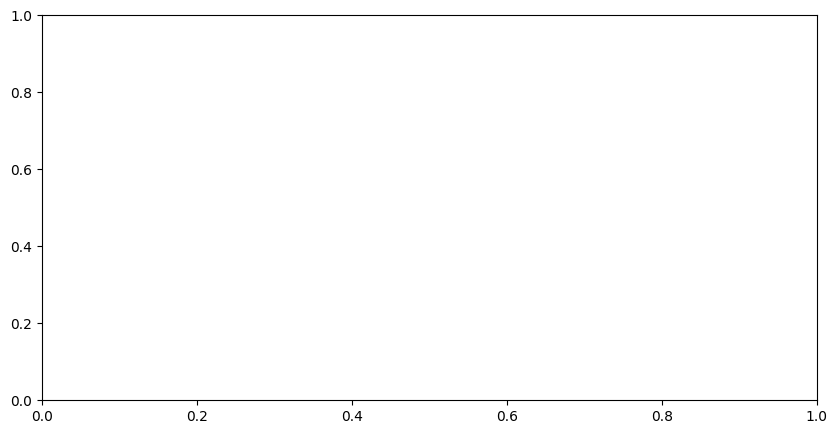